#**AGN Spectral Analysis 1**


  Welcome to notebook # 1 of AGN spectral analysis.
This will be pretty much the rundown of the homework you were given before the start of ThaiPASS'24.

However, there is a twist to this exercise!

In [ ]:
#If you are working on the Colab, it would be a good idea to mount your Google Drive here.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First, in both Colab and Anaconda Cloud starting packages do not comes with "astroquery". So, "!pip install astroquery".

Then, we will import all the necessary packages such as numpy, matplotlib.pyplot, astroquery (which installed but not imported yet), curve_fit from scipy, and pandas.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from astroquery.sdss import SDSS
from scipy.optimize import curve_fit
import pandas as pd

Not really needed but the following is to set up the fonts, size, and thickness of your plots.


In [ ]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [ ]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['legend.fontsize'] = 12

Next, download the comma-separated-values file from the folder, using **pandas.readcsv**.

Here I have the table at **"data/table_dr17_qso_abs_krc213.csv"**
However, you can download it into your own machine or Colab folder. But becareful to correctly link the path to ypur table.

In [ ]:
agn_df = pd.read_csv('...')

Next, let's look at all the columns in this table.

In [ ]:
print(...)

Index(['specObjID', 'ra', 'dec', 'u', 'err_u', 'g', 'err_g', 'r', 'err_r', 'i',
       'err_i', 'z', 'err_z', 'plate', 'fiberID', 'redshift', 'snMedian',
       'snMedian_u', 'snMedian_g', 'snMedian_r', 'snMedian_i', 'snMedian_z',
       'mjd_plate', 'mjd_phot', 'mjd_u', 'mjd_g', 'mjd_r', 'mjd_i', 'mjd_z',
       'Type', 'class', 'fiberMag_u', 'fiberMagErr_u', 'fiberMag_g',
       'fiberMagErr_g', 'fiberMag_r', 'fiberMagErr_r', 'fiberMag_i',
       'fiberMagErr_i', 'fiberMag_z', 'fiberMagErr_z', 'fiberFlux_u',
       'fiberFluxIvar_u', 'fiberFlux_g', 'fiberFluxIvar_g', 'fiberFlux_r',
       'fiberFluxIvar_r', 'fiberFlux_i', 'fiberFluxIvar_i', 'fiberFlux_z',
       'fiberFluxIvar_z', 'spectroFlux_u', 'spectroFluxIvar_u',
       'spectroFlux_g', 'spectroFluxIvar_g', 'spectroFlux_r',
       'spectroFluxIvar_r', 'spectroFlux_i', 'spectroFluxIvar_i',
       'spectroFlux_z', 'spectroFluxIvar_z', 'kcorrU', 'kcorrG', 'kcorrR',
       'kcorrI', 'kcorrZ', 'absMagU', 'absMagG', 'absMagR', 'absMag

In [ ]:
print( ... )

[ 326555535769888768  341223290292955136  324356238626285568 ...
 8692060391558371328 8687676363753412608 7324128812530423808]


Once, we have the knowledge of all the columns in the table. Let's plot the distribution on the sky projection of these AGN.

Text(0, 0.5, 'Dec [degree]')

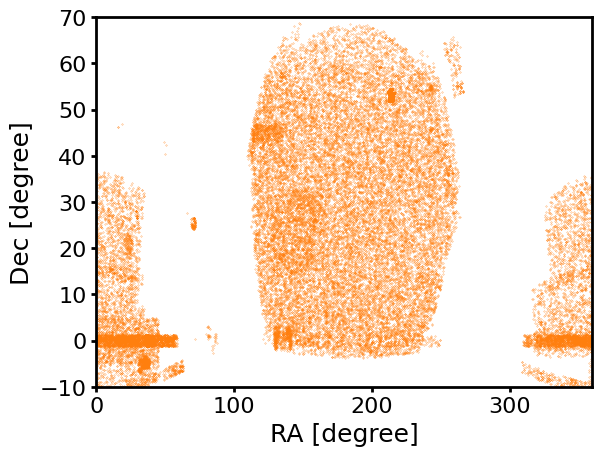

In [ ]:
plt.scatter(...)
plt.xlim([0,360])
plt.ylim([-10.0, 70.0])
plt.xlabel('RA [degree]')
plt.ylabel('Dec [degree]')

Why are they distributed like so?
What are the limitation, bias, or caveat of this sample?

#*Task 1: Number Density of the AGN*

Let's pick an "average" area on the sky and calculate the number density of these "observed" AGN per unit area (square degree).

**Extra Credits:** There is another table that contain non-AGN galaxies. Could you use this table compare the numberdensity of these populations (AGN vs Galaxies)?


In [ ]:
upper_dec = ...
lower_dec = ...
right_ra  = ...
left_ra   = ...
good_area = np.where((agn_df.ra <= right_ra) & (agn_df.ra >= left_ra) & (agn_df.dec >= lower_dec) & (agn_df.dec <= upper_dec))
ra_agn_good_area  = ...
dec_agn_good_area = ...
area_deg = ...

1313.1391470983897


3.3796875295405946


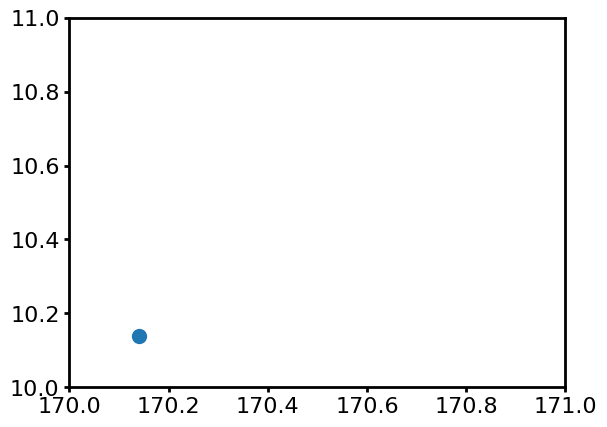

In [ ]:
...

In [ ]:
...

0.766044443118978


In [ ]:
...

0.984807753012208

# Good, good, good.
Next, let's define what constitute a bright and relatively close-by AGN by using signal-to-noise ratio (SNR) and redshift.
Set the SNR of the spectra to be larger than **40**, and the redshift (spectroscopic) to be under **0.4**.

Additionally, you can set the i-band apparent magnitude to be brighter than **16** mag (AB)

**How many of these AGN within the sample?**


**Hint:** Remember what does a brighter magnitude mean?

In [ ]:
bright_agn = np.where(...)
#print(agn_df.i.values[bright_agn], agn_df.redshift.values[bright_agn], agn_df.fiberID.values[bright_agn], agn_df.plate.values[bright_agn], agn_df.mjd_plate.values[bright_agn])

print(len(bright_agn[0]))

329


# **Task 2: Download the spectrum**

Pick one of these bright AGN and get there plate number, fiberID, and MJD of the observation. These 3 identifiers will be used for querying the spectrum of that particular AGN.

Use *SDSS.get_spectra* to download the spectrum.
Hint: The spectrum opbtained will be in form of fits table with multiple layers.

You can explore the header to see which layer that contains the information that you want.

OR

Go to layer [0][1] for wavelength and flux density and layer [0][2] for spectroscopic redshift.

And plot to see what the spectrum looks like.

*What is the flux density unit? Could you find that in the header?*


In [ ]:
i=...
bright_agn_spec = SDSS.get_spectra(plate=...,
                                      mjd=...
                                     fiberID=...)

In [ ]:
bright_agn_spec[...][...].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4585903027.03 / 1st row - Number of seconds since Nov 17 1858  
RA      =            167.74858 / 1st row - Right ascension of telescope boresigh
DEC     =            11.981900 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '09:00:12.64'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                53078 / MJD of observation                             
MJDLIST = '53075 53078'     

In [ ]:
...

[3.579  3.5791 3.5792 ... 3.9629 3.963  3.9631] [54.32495  56.751    62.39591  ... 67.487274 63.098976 66.37671 ] [0.02034269 0.02022538 0.01948592 ... 0.22482456 0.24363463 0.23093176] [0.04216975] 0.04216975


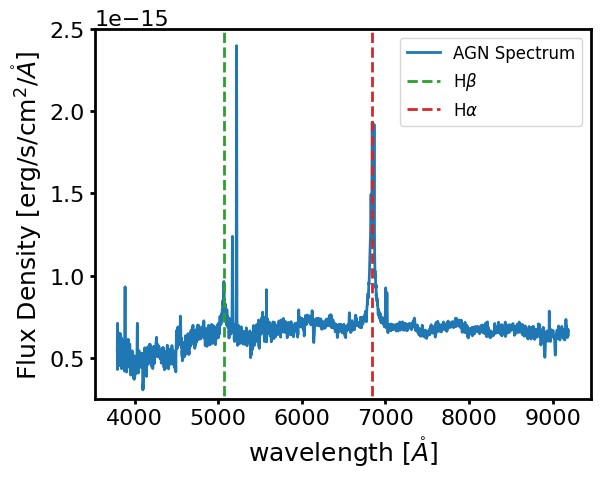

In [ ]:
plt.plot(10.0**....data['loglam'], ....data['flux']*1e-17, label='AGN Spectrum')
plt.plot([4861.0*(1.0 + ....data['z']),4861.0*(1.0 + ....data['z'])], [0,2.5e-15], ls='--', c='C2', label=r'H$\beta$')
plt.plot([6563.0*(1.0 + ....data['z']),6563.0*(1.0 + ....data['z'])], [0,2.5e-15], ls='--', c='C3', label=r'H$\alpha$')
plt.ylim([0.25e-15,2.5e-15])
plt.xlabel(r'wavelength [$\mathring{A}$]')
plt.ylabel(r'Flux Density [erg/s/cm$^2$/$\mathring{A}$]')
plt.legend()

Pick the region surrounding H-alpha or H-beta emission lines and Zoom in (+/-100 angstrom range)!
What are the rest wavelength of these lines.

***Hint:*** Do not forget that the lines are redshifted.

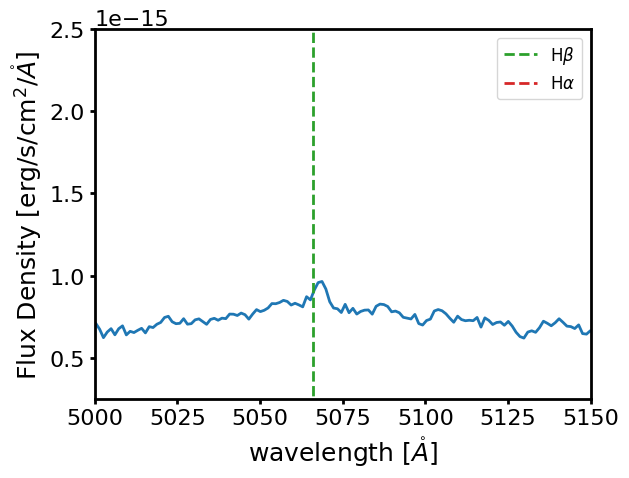

In [ ]:
plt.plot(...)
plt.ylim([...,...])
plt.xlim([...,...])
plt.xlabel(r'wavelength [$\mathring{A}$]')
plt.ylabel(r'Flux Density [erg/s/cm$^2$/$\mathring{A}$]')
plt.legend()

In [ ]:
#Obtain the starting element and ending element of the desire range of wavelength (let's do +/- 200 angstrom from the peak)

wvl_agn = ...
flux_agn = ...
flux_err = ...
#centroid_guess = 6563.0*(...)[0]
centroid_guess = 4861.0*(...)[0]

start_wvl = np.where(np.absolute(...) == np.min(np.absolute(...)))[0][0]
end_wvl   = np.where(np.absolute(...) == np.min(np.absolute(...)))[0][0]

print(start_wvl, end_wvl)


1082 1425


In [ ]:
print(flux_err)

[1.4262781e-18 1.4221596e-18 1.3959197e-18 ... 4.7415668e-18 4.9359356e-18
 4.8055360e-18]


# Task 3: Here comes the twist!

The emission features that you have fitted in the home work is just the very rudimentary estimation.

Now, let's build a fitting routine that can fit both broad and narrow components of Balmer emission lines, plus doublets ([OIII] or [NII]).

**Hint:** Use the FWHM of 1,000 km/s (rest-frame) or less for narrow emission line. And 1,000 - 10,000 km/s for broad lines.
You can use 1 or 2 components for each of the twins [OIII] and [NII].

In [ ]:
def gaussian_profile_multi(x, c_narrow, c_broad, c1, c2, h_narrow, h_broad, h1, h2, sigma_narrow, sigma_broad, sig1, sig2, base):
    ...
    return y

c_narrow_guess = ...
c_broad_guess  = ...
c1_guess = ...
c2_guess = ...

sigma_narrow_guess = c_narrow_guess*(.../2.35)/3.0e+5
sigma_broad_guess  = c_broad_guess*(.../2.35)/3.0e+5
sig1_guess         = c1_guess*(.../2.35)/3.0e+5
sig2_guess         = c2_guess*(.../2.35)/3.0e+5

p0_guess = [c_narrow_guess, c_broad_guess, c1_guess, c2_guess, 1.0e-17, 1.0e-17, 1.0e-17, 1.0e-17, sigma_narrow_guess, sigma_broad_guess, sig1_guess, sig2_guess, 1.0e-16]
bounds_guess   = ((c_narrow_guess - 50.0, c_broad_guess - 50.0, c1_guess - 20.0, c2_guess - 20.0, 0.0, 0.0, 0.0, 0.0, sigma_narrow_guess/2.0, sigma_broad_guess/2.0, sig1_guess/2.0, sig2_guess/2.0, 0.0),
                  (c_narrow_guess + 50.0, c_broad_guess + 50.0, c1_guess + 20.0, c2_guess + 20.0, np.inf, np.inf, np.inf, np.inf, sigma_narrow_guess*5.0, sigma_broad_guess*5.0, sig1_guess*5.0, sig2_guess*5.0, np.inf))


In [ ]:
popt_beta, pcov_beta = curve_fit(...,....,....,....,....,
                                  p0=p0_guess,
                                  bounds=bounds_guess, maxfev=...)

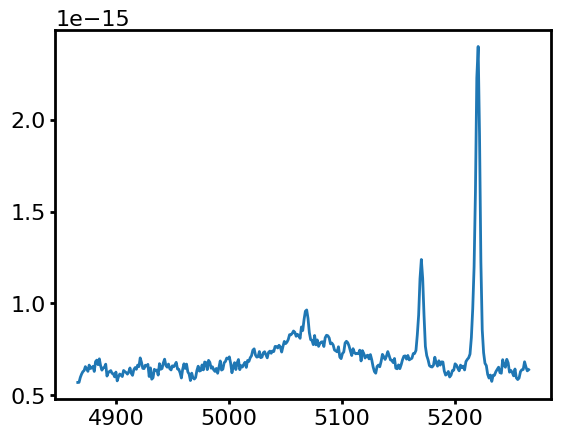

In [ ]:
...

[5.06797710e+03 5.07154909e+03 5.17004771e+03 5.21997590e+03
 1.59621888e-16 1.59943914e-16 5.67317747e-16 1.74625970e-15
 2.84078127e+00 5.15438089e+01 3.06792275e+00 2.80480596e+00
 6.46401316e-16]


In [ ]:
...

[5.4324950e-16 5.6751001e-16 6.2395909e-16 ... 6.7487271e-16 6.3098973e-16
 6.6376710e-16]


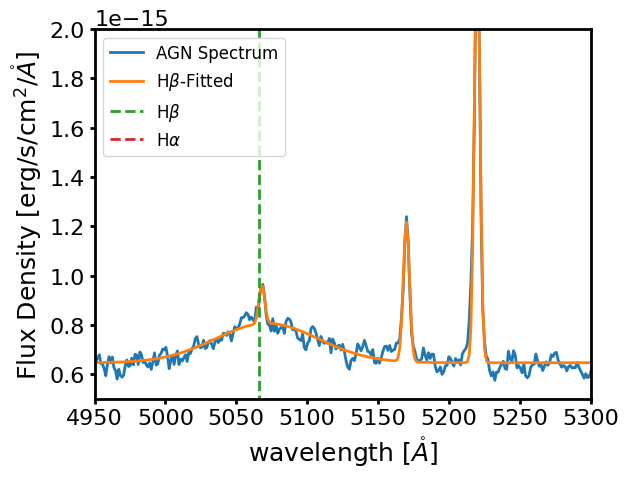

In [ ]:
plt.plot(10.0**bright_agn_spec[0][1].data['loglam'], bright_agn_spec[0][1].data['flux']*1e-17, label='AGN Spectrum')
plt.plot(10.0**bright_agn_spec[0][1].data['loglam'], ..., label=r'H$\beta$-Fitted')
plt.plot([4861.0*(1.0 + bright_agn_spec[0][2].data['z']),4861.0*(1.0 + bright_agn_spec[0][2].data['z'])], [0,2.5e-15], ls='--', c='C2', label=r'H$\beta$')
plt.plot([6563.0*(1.0 + bright_agn_spec[0][2].data['z']),6563.0*(1.0 + bright_agn_spec[0][2].data['z'])], [0,2.5e-15], ls='--', c='C3', label=r'H$\alpha$')
plt.ylim([0.5e-15,2.0e-15])
plt.xlim([4950.0,5300.0])
plt.xlabel(r'wavelength [$\mathring{A}$]')
plt.ylabel(r'Flux Density [erg/s/cm$^2$/$\mathring{A}$]')
plt.legend()

**Use the fitted parameters and answer the following questions:**

*   What is the flux density at rest-frame 5,100 angstrom?
*   What is the integrated flux of H-beta (or H-alpha) emission features?
*   What is the integrated flux of [OIII] (or [NII]) emission features?
*   What is the ratio between high-excitation line flux vs. the nearest Balmer line?
*   Based on the equations 1 and 2 in this paper (https://iopscience.iop.org/article/10.3847/1538-4357/ab5b90), what is the estimated SMBH of the AGN?



In [ ]:
print(popt_beta)


[5.06797710e+03 5.07154909e+03 5.17004771e+03 5.21997590e+03
 1.59621888e-16 1.59943914e-16 5.67317747e-16 1.74625970e-15
 2.84078127e+00 5.15438089e+01 3.06792275e+00 2.80480596e+00
 6.46401316e-16]


In [ ]:
from scipy.integrate import quad, trapezoid

def guassian_single(x, centroid, height, sigma): #defining a single Gaussian profile equation
    ...
    return y

FL5100 = (1.0 + ...)* popt_beta[12]
print(FL5100)

x_integ = np.linspace(0.0,10000.0, 10000)

flux_beta_narrow = trapezoid(...)
flux_beta_broad  = trapezoid(...)
flux_OIIIa       = trapezoid(...)
flux_OIIIb       = trapezoid(...)

#trapezoid(y, x=None, dx=1.0, axis=-1)

print(flux_beta_narrow, flux_beta_broad, flux_OIIIa, flux_OIIIb)

ratio_beta_all = (flux_OIIIa + flux_OIIIb)/(flux_beta_narrow + flux_beta_broad)
ratio_beta_narrow = (flux_OIIIa + flux_OIIIb)/(flux_beta_narrow)

print(ratio_beta_all, ratio_beta_narrow)


[6.7365997e-16]
8.037207388186271e-16 1.4612319635396103e-14 3.084932930229578e-15 8.68133646989735e-15
0.763248481095541 14.639748399950372


In [ ]:
# Set up the cosmology to calculate luminosity distance from redshift
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

lum_dist_Mpc = cosmo.luminosity_distance(...)
lum_dist_cm  = ...

hbeta_luminosity = flux_beta_broad*4.0*np.pi*(lum_dist_cm**2.0)
halpha_luminosity = ...

FWHM_hbeta = 2.35*... # in km/s
FWHM_halpha = ...

SMBH_mass = ...


# **Task 4: The Challenge**

Download the data cube of MaNGA survey: https://magrathea.sdss.org/marvin/galaxy/8713-9102/

Note: Go to "Download button and select Cube"

This is a nearby AGN observed by integral-field unit (IFU)spectrograph. Thus every point represents the actual spatial distribution of clump of stars, gas, and dust of the galaxies on the sky. And every pixel (spaxel) can be extracted to get an entire spectrum from 3,000-10,000 angstrom.

This is a Seyfert-I galaxy, called MRK-382.
Please note down the redshift and other properties of this galaxy.

Then, let's read the fits file into the notebook.
But, first, you will need to install astroML.

In [ ]:
!pip install astroml
!pip install astropy

In [ ]:
from astropy.io import fits




In [ ]:
hdu_cube = fits.open('...')
# Display information about the FITS file contents
hdu_cube.info()


Filename: /content/drive/MyDrive/ThaiPASS24/AGN/data/manga-8713-9102-LOGCUBE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (64, 64, 4563)   float32   
  2  IVAR          1 ImageHDU        17   (64, 64, 4563)   float32   
  3  MASK          1 ImageHDU        17   (64, 64, 4563)   int32   
  4  LSFPOST       1 ImageHDU        11   (64, 64, 4563)   float32   
  5  LSFPRE        1 ImageHDU        11   (64, 64, 4563)   float32   
  6  WAVE          1 ImageHDU         9   (4563,)   float64   
  7  SPECRES       1 ImageHDU         9   (4563,)   float64   
  8  SPECRESD      1 ImageHDU         9   (4563,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (4563,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (4563,)   float64   
 11  OBSINFO       1 BinTableHDU    148   12R x 65C   [25A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E,

[ 3621.59598486  3622.42998417  3623.26417553 ... 10349.03843826
 10351.42166679 10353.80544415]


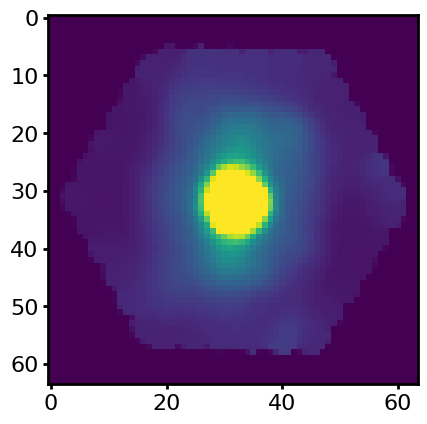

In [ ]:
flux_cube = ....daya
wave_cube = ....data
print(wave_cube)
plt.imshow(np.average(flux_cube, axis=0), vmin=0, vmax=0.5)

In [ ]:
# loop over the spaxels to obtain flux, flux ratio, velocity dispersion, etc.
Hbeta_flux_array = np.zeros((64,64))
...
...
...
...
...

for spax in range (0,64):
  for spay in range(0,64):
    Hbeta_flux_array[spax, spay] = ...
    ...

Your mission if you choose to accept is to obtain fluxes and velocity dispersion (sigma in km/s) of these key emission lines (H-beta, [OIII], [NII], H-alpha) for all spaxel.

Use what you have learn from the previous tasks to create the BPT map (https://ned.ipac.caltech.edu/level5/Glossary/Essay_bpt.html).

This is a way to characterize and categorize each region of a galaxy into ionization due to AGN and star-formation driven processes.

Download the BPT boundary from AstroML and plot it.

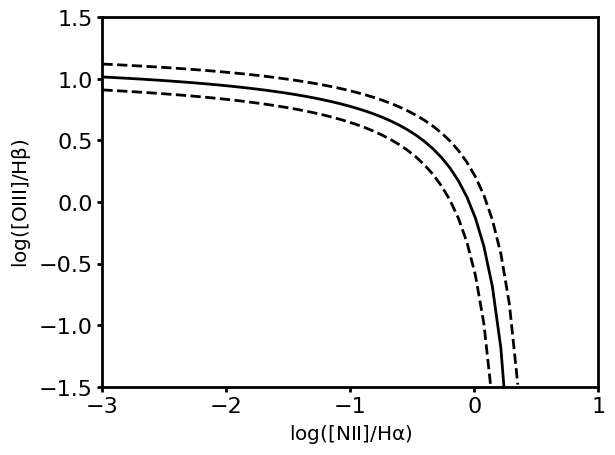

In [ ]:
from astroML.datasets.tools.sdss_fits import log_OIII_Hb_NII

log_NII_Halpha = np.linspace(-3.0, 0.35)
plt.plot(log_NII_Halpha, log_OIII_Hb_NII(log_NII_Halpha), '-k')
plt.plot(log_NII_Halpha, log_OIII_Hb_NII(log_NII_Halpha, 0.1), '--k')
plt.plot(log_NII_Halpha, log_OIII_Hb_NII(log_NII_Halpha, -0.1), '--k')
plt.xlim(-3.0, 1.0)
plt.ylim(-1.5, 1.5)

plt.xlabel(r'$\mathrm{log([NII]/H\alpha)}$', fontsize='large')
plt.ylabel(r'$\mathrm{log([OIII]/H\beta)}$', fontsize='large')
plt.show()

Now, plot scatter values of log([OIII]/H-beta) vs log([NII]/H-alpha) onto the BPT diagram. Which line above (AGN process) and below (SF process) this boundary?

Could you map the area of the AGN and Star Formation onto the 2D map of the galaxy?



In [ ]:
...
...
...
...
...

# **Task 5: Super challenge**

Could you make a map of velocity dispersion and line-of-sight velocity of this galaxy based on the components of H-beta (or H-alpha) emission line?

In [ ]:
...
...
...
...
...